# Ouray Parcel Susceptibility with Exposure Overlay
**Author**: Bryce A Young  
**Created**: 2025-05-15  
**Modified**: 2025-05-15  
## Overview  
In this notebook, we take outputs from the Ouray parcel susceptibility project and overlay with data from [Wildfire Risk to Communities (WRC)](https://wildfirerisk.org/download/ "Data Download"). The WRC data layer used is Risk to Potential Structures (RPS). It is described on the website as "A measure that integrates wildfire likelihood and intensity with generalized consequences to a home on every pixel." In other words, the raster contains information on hazard and exposure. By multiplying the RPS value with the susceptibility score of each home, we can gain better insights to generalized parcel risk.

This notebook follows this general workflow:  
1. Prepare raster
    - Import Ouray County boundary (EPSG:26913) and reproject to EPSG:5070 to match the RPS raster. 
    - Rasterize county geometry (using `rast_and_write` function in `utils.raster`)  
    - Use rasterized county boundary to clip the CONUS RPS raster to Ouray County  
    - Reproject clipped RPS raster to EPSG:26913  
2. Obtain RPS values at the centroid of each structure footprint, appending values to the geodataframe. 
3. Explore results  

## Set Up Environment

In [1]:
# setup environment
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# rps path
rps_path = r"D:\_DATA\WRC\RPS_CONUS_2020\RPS_CONUS\RPS_CONUS.tif"
# output folder for clipped RPS raster
out = os.path.join(data, 'risk')
# county boundary folder
geoms = os.path.join(data, 'county_geoms')

## Prepare Raster
### **1** Reproject and rasterize county boundary

<Axes: >

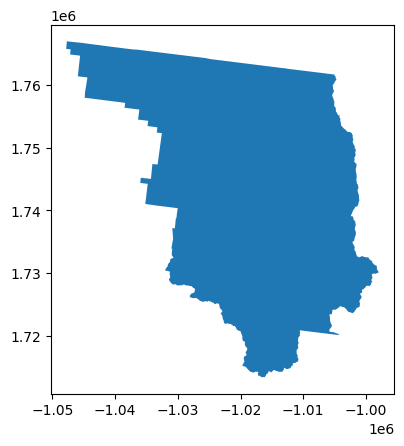

In [2]:
import geopandas as gpd

county = gpd.read_file(os.path.join(geoms, 'county_WKID26913.gpkg'))
county_5070 = county.to_crs(5070)

county_5070.plot()